### Support Vector Classifier Implementation

In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
## Lets create synthetic data points 
from sklearn.datasets import make_classification

In [21]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [22]:
X

array([[ 0.63940266,  1.04437142],
       [ 1.39232848, -2.14537427],
       [-1.50596159, -1.66568667],
       ...,
       [ 1.03037326, -1.4396405 ],
       [-1.66675468,  1.12257863],
       [-1.07479656,  0.43933457]])

In [23]:
y

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,

<Axes: xlabel='0', ylabel='1'>

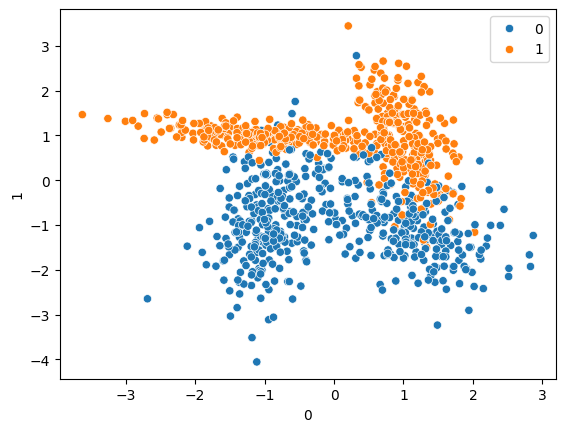

In [24]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [26]:
from sklearn.svm import SVC

In [27]:
svc=SVC(kernel='linear')

In [28]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [29]:
y_pred=svc.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix


In [31]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       125
           1       0.90      0.95      0.93       125

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250

[[112  13]
 [  6 119]]


In [32]:
rbf=SVC(kernel='rbf')

In [33]:
rbf.fit(X_train,y_train)

SVC()

In [34]:
y_pred=rbf.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       125
           1       0.92      0.95      0.93       125

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[114  11]
 [  6 119]]


In [36]:
from sklearn.model_selection import GridSearchCV
# defining parameter range 
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [37]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=True)

In [38]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=True)

In [39]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [40]:
y_pred=rbf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       125
           1       0.92      0.95      0.93       125

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[114  11]
 [  6 119]]
